In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure, util
from tqdm import tqdm

(517, 517) (517, 517)


(-0.5, 516.5, 516.5, -0.5)

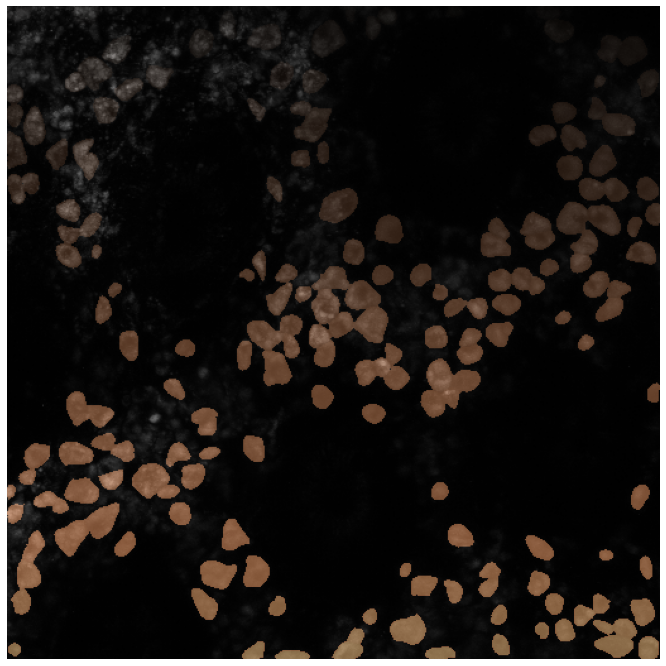

In [26]:
mask = np.load('../4 Raw data/max_expanded_mask_XY.npy')[0]
image = io.imread('../4 Raw data/max_expanded.tif')[0]
print(
    mask.shape,
    image.shape)

fig = plt.figure(figsize=(12, 12))
plt.imshow(image, cmap='gray')
plt.imshow(mask, cmap='copper', alpha=0.5)
plt.axis('off')

# Checking the cell area distribution

 99%|█████████▉| 185/186 [00:00<00:00, 4912.11it/s]


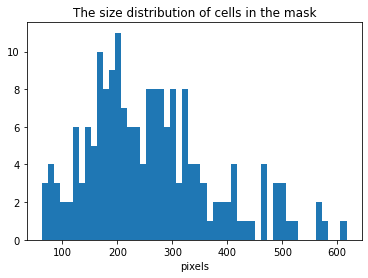

In [28]:
stats = []
N = mask.max()+1
pbar = tqdm(total=N)
for i in range(1,N):
    seg = mask == i
    size = np.sum(seg)
    stats.append(size)
    pbar.update(1)

pbar.close()

plt.title('The size distribution of cells in the mask')
plt.xlabel('pixels')
plt.hist(stats, 50);

# Visualization of segmented cells

In [56]:
def bbox(seg):
    """
    Compute the bounding box of a segmentation.
    """
    rows = np.any(seg, axis=1)
    cols = np.any(seg, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

In [50]:
def bbox(seg):
    """Returns the bounding box of a segmentation mask

    Args:
        seg (np.array): segmentation mask array 2D

    Returns:
        ymin, ymax, xmin, xmax (int): bounding box coordinates
    """
    rows = np.any(seg, axis=0)
    cols = np.any(seg, axis=1)
    xmin, xmax = np.where(rows)[0][[0, -1]]
    ymin, ymax = np.where(cols)[0][[0, -1]]
    return ymin, ymax, xmin, xmax

def get_segment(mask:np.array, image:np.array, size:int=50, make_zero:bool = False):
    #TODO:negative indexing must be prohibited
    ymin, ymax, xmin, xmax = bbox(mask)
    cx, cy = (xmin+xmax)//2, (ymin+ymax)//2
    y0, y1 = cy-size//2, cy+size//2
    x0, x1 = cx-size//2, cx+size//2

    if y0 < 0 or x0 < 0 or y1 > image.shape[0] or x1 > image.shape[1]: return None
    seg = np.copy(image[y0:y1, x0:x1])
    m   = np.copy( mask[y0:y1, x0:x1])
    if seg.shape[0] == 0 or seg.shape[1] == 0: return None
    if make_zero:
        seg[m == 0] = 0
    return seg, m 

def draw_contours(mask):
    """Draws contours of a binary mask

    Args:
        mask (np.array): mask array 2D
    """
    contours = measure.find_contours(mask != 0)
    for contour in contours:
        line = plt.plot(contour[:,1], contour[:,0], color='green')

imin, imax = 1, np.max(mask)
cells = []
plot = False
stack = image.copy()
offset = 5
make_zero = True
print(f'Number of estimated cells: {imax}')
for i in range(imin, imax+1):
    m = mask == i
    # if np.sum(np.sum(m[m != 0]))>10:
    output = get_segment(m, stack, size = 40, make_zero=make_zero)
    if output is not None:
        cell, m = output
        cells.append(cell)
        if plot:
            plt.title(i)
            plt.imshow(cell, cmap='gray')
            # draw_contours(m)
            plt.show()

cells.sort(key = lambda x: np.sum(x))


Number of estimated cells: 185


(-0.5, 533.5, 533.5, -0.5)

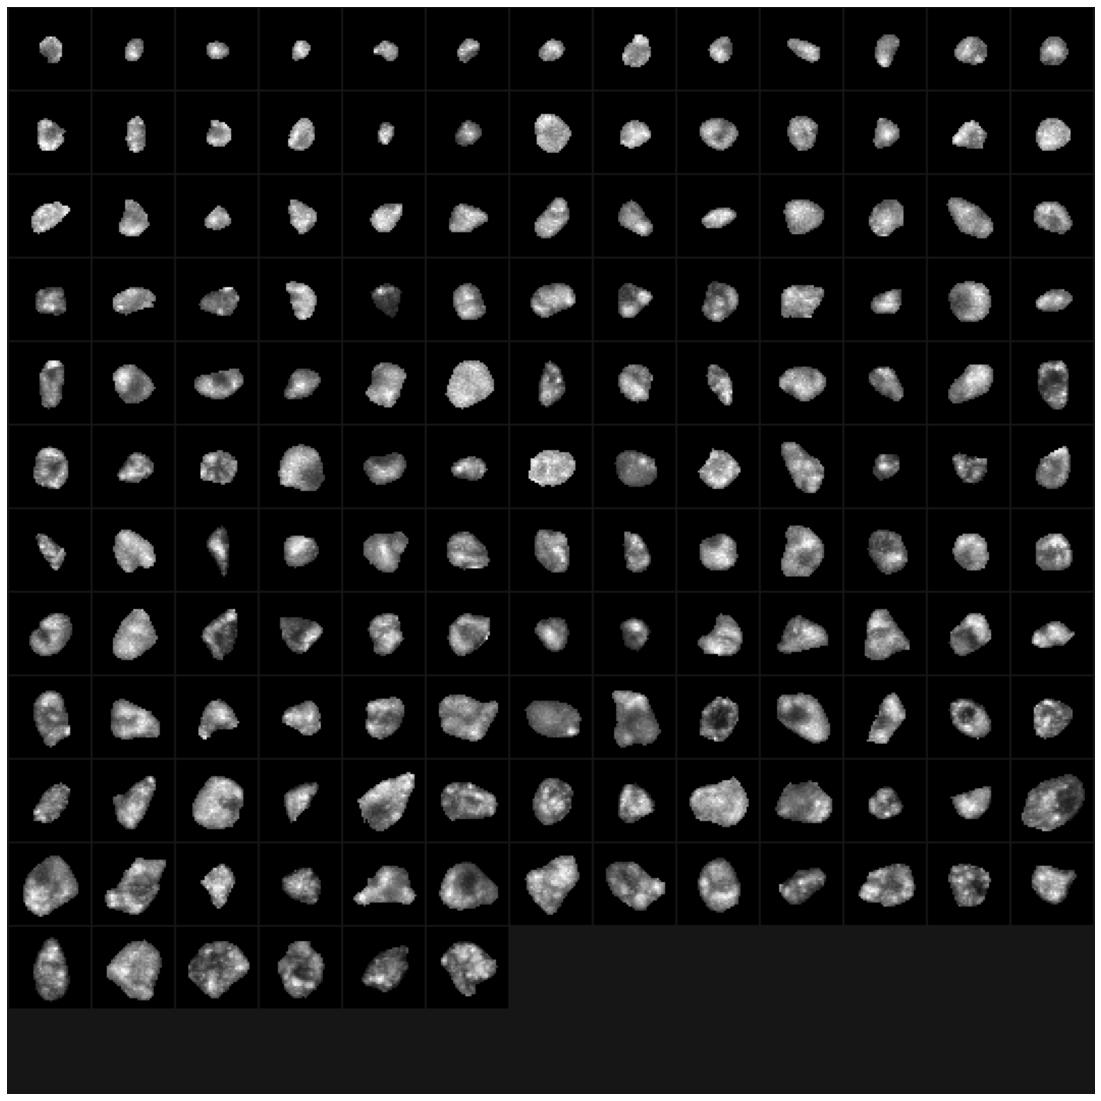

In [51]:
montage = util.montage(cells, padding_width = 1, rescale_intensity=True)
fig = plt.figure(figsize=(20,20))
plt.imshow(montage, cmap='gray')
plt.axis('off')

In [45]:
cells